# Exploring Instagram Posts with NLP and kMeans

##### Reference: https://www.kaggle.com/kitakoj18/exploring-wine-descriptions-with-nlp-and-kmeans

Load the libraries for dataset preparation, feature engineering, model training:

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

Unpickle and load our dataset

In [39]:
import os
import pickle
data = pickle.load(open(os.getcwd()+'\\Data\\insta_locations.pkl','rb'))
data.head()

,City,Country,Lat,Location,Location Link,Lon,Phone,Posts Descriptions,Street,Website,Date of scrape
0,Alella,ES,41.497825,Els Garrofers,https://www.instagram.com/explore/locations/10...,2.292033,34935401794,[Me llena de orgullo y satisfacción anunciar q...,"Can Doctor. Passeig Antoni Borrell, 13",http://www.elsgarrofers.com,2018-11-22 22:53
1,"Bacalar, Quintana Roo",MX,18.760225,Bacalar,https://www.instagram.com/explore/locations/14...,-88.312569,,"[Wanna wake up everyday seeing that, swimming ...",Quintana Roo,http://grandcostamaya.gob.mx/,2018-11-22 22:53
2,"Bangkok, Thailand",TH,13.764660,7-11,https://www.instagram.com/explore/locations/11...,100.473230,0998018537,[Oreo ice cream! So gooood 💕#711 #อร่อยสมคำล่ำ...,ประเทศไทย,https://www.7eleven.co.th,2018-11-22 22:53
4,"Barcelona, Spain",ES,41.393720,BOB Oyster Bcn,https://www.instagram.com/explore/locations/20...,2.153520,936 888 981,[1er Anniversario. Ven a celebrarlo con nosotr...,"C/ París, 190",www.boboysterbcn.com/,2018-11-22 22:53
5,"Barcelona, Spain",ES,41.382425,Barcelona.cat,https://www.instagram.com/explore/locations/21...,2.177267,+34 93 402 70 00,[Tú y yo tenemos telepatía\nCuando te miro y t...,"Pl. Sant Jaume, 1",http://www.barcelona.cat,2018-11-22 22:53


Note that the 'Posts Descriptions' column is a list, which needs to be converted into a separate row so that we can analyse the data after. We will do this using thw following approach (ref. https://mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas-9849d8ff2401)

* Split the 'Posts Description' column into new columns;
* Then merge the columns with the rest of the data set;
* Then drop the old descriptions column;
* Then transform the numeric columns into rows using the melt function;
* Then remove the “variable” column which contains the ids of the numeric columns;
* Finally, get rid of the empty values.

_\* Note that the backslash (\\) character is used to escape characters that otherwise have a special meaning, such as newline._

In [40]:
col_list = list(data.columns.values)
col_list.remove('Posts Descriptions')

In [42]:
data2 = data['Posts Descriptions'].apply(pd.Series) \
    .merge(data, left_index = True, right_index = True) \
    .drop(["Posts Descriptions"], axis = 1) \
    .melt(id_vars = col_list, value_name = "Post Description") \
    .drop("variable", axis = 1) \
    .dropna()

#### Exploratory Data Analysis
(i.e. check where values are missing)

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 622
Data columns (total 11 columns):
City                571 non-null object
Country             571 non-null object
Lat                 571 non-null float64
Location            571 non-null object
Location Link       571 non-null object
Lon                 571 non-null float64
Phone               571 non-null object
Street              571 non-null object
Website             571 non-null object
Date of scrape      571 non-null object
Post Description    571 non-null object
dtypes: float64(2), object(9)
memory usage: 53.5+ KB


#### Natural Language Processing

In [71]:
punc = ['.', ',', '"', "'", '?', '!', '¿', '¡', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
#nltk.download()
stop_words_en = text.ENGLISH_STOP_WORDS
stop_words_es = stopwords.words('spanish')
stop_words = stop_words_en.union(stop_words_es).union(punc)
desc = data2['Post Description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [74]:
word_features = vectorizer.get_feature_names()
word_features[550:575]

['beautifuldestinations',
 'beautifulgirl',
 'beauty',
 'bechamel',
 'beef',
 'beer',
 'beergasm',
 'beergeek',
 'beerlover',
 'beerlovers',
 'beerme',
 'beernerd',
 'beeroftheday',
 'beerpics',
 'beerpong',
 'beerporn',
 'beers',
 'beershop',
 'beersnob',
 'beersofinstagram',
 'beerstagram',
 'beertime',
 'beertography',
 'beerus',
 'beetroot']

As we can see from above, there is a very large list of words, with many cases where words share the same roots. 

We need to stem/lemmatize those (i.e. reduce words to their root forms). There are various stemmers and lemmatizers, but for this exerceise we will use Snowball Stemmer.

In [75]:
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [76]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

['aalamin',
 'aap',
 'abandon',
 'abanik',
 'abarrot',
 'abbiam',
 'abbinament',
 'abiert',
 'abiliti',
 'abiteofbarcelon',
 'able',
 'aboutlastnight',
 'abov',
 'abren',
 'abri',
 'abril',
 'abrir',
 'abro',
 'abuelit',
 'acab',
 'acaibowl',
 'accessori',
 'accessory',
 'accidentally',
 'accogli',
 'accompagnat',
 'accounting',
 'accueill',
 'aceit',
 'aceitun',
 'acept',
 'achech',
 'acidit',
 'acogedor',
 'acomp',
 'acompany',
 'acting',
 'actual',
 'ad',
 'ada',
 'adas',
 'addict',
 'adejuanmayan',
 'adem',
 'adi',
 'adict',
 'admin',
 'admit',
 'ado',
 'adob']

Below, we take it one step further by adjusting the max_features parameter in the tf-idf vectorizer, which selects only the top max_features tokens ordered by their frequencies in the corpus to be included in the vectorizing.

In [77]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

#### kMeans Clustering
Now that the text preprocessing is done, I can finally apply the kMeans algorithm to cluster our description vectors. 

In [78]:
kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=5, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : silvestrebcn, patat, n, parmenti, tart, truf, salm, delici, langostin, hoy
1 : barcelon, s, tac, foodi, n, food, avoc, foodporn, par, d
2 : paell, tap, dell, che, di, galici, espa, il, vi, dinn
3 : cecin, rap, envuelt, buey, bas, truf, sobr, pur, patat, carmendaneas
4 : orig, casapalet, carmendaneas, casapaletglori, foodlovers, orgasmicfood, bcngourmet, pasionporlacocin, bcncom, foi
5 : total, balear, ok, natur, igersmenorc, sunset, menorc, lov, balears, igersbalears
6 : langostin, foi, tomat, espinac, sec, ensal, carmendaneas, orig, casapalet, casapaletglori
7 : oysters, cav, birthday, r, foods, foodporn, foodpictur, foodpics, foodpic, foodphotography
8 : bangkokmarathon, bdmsbangkokmarathon, healthylifestyl, bdms, bangkok, foodlov, foodlovers, foodofinstagram, foodpassion, foodphotography
9 : portalon, instafood, elportalon, goodfood, restaurant, restaur, portal, tasty, bcn, delicious
10 : bacal, viaj, tod, zon, foods, foodporn, foodpictur, foodpics, foodpic, foodphotography
11 :

Let's create a heatmap that maps out each of the locations and their counts in each of the 15 clusters. 

In [80]:
data2['cluster'] = kmeans.labels_

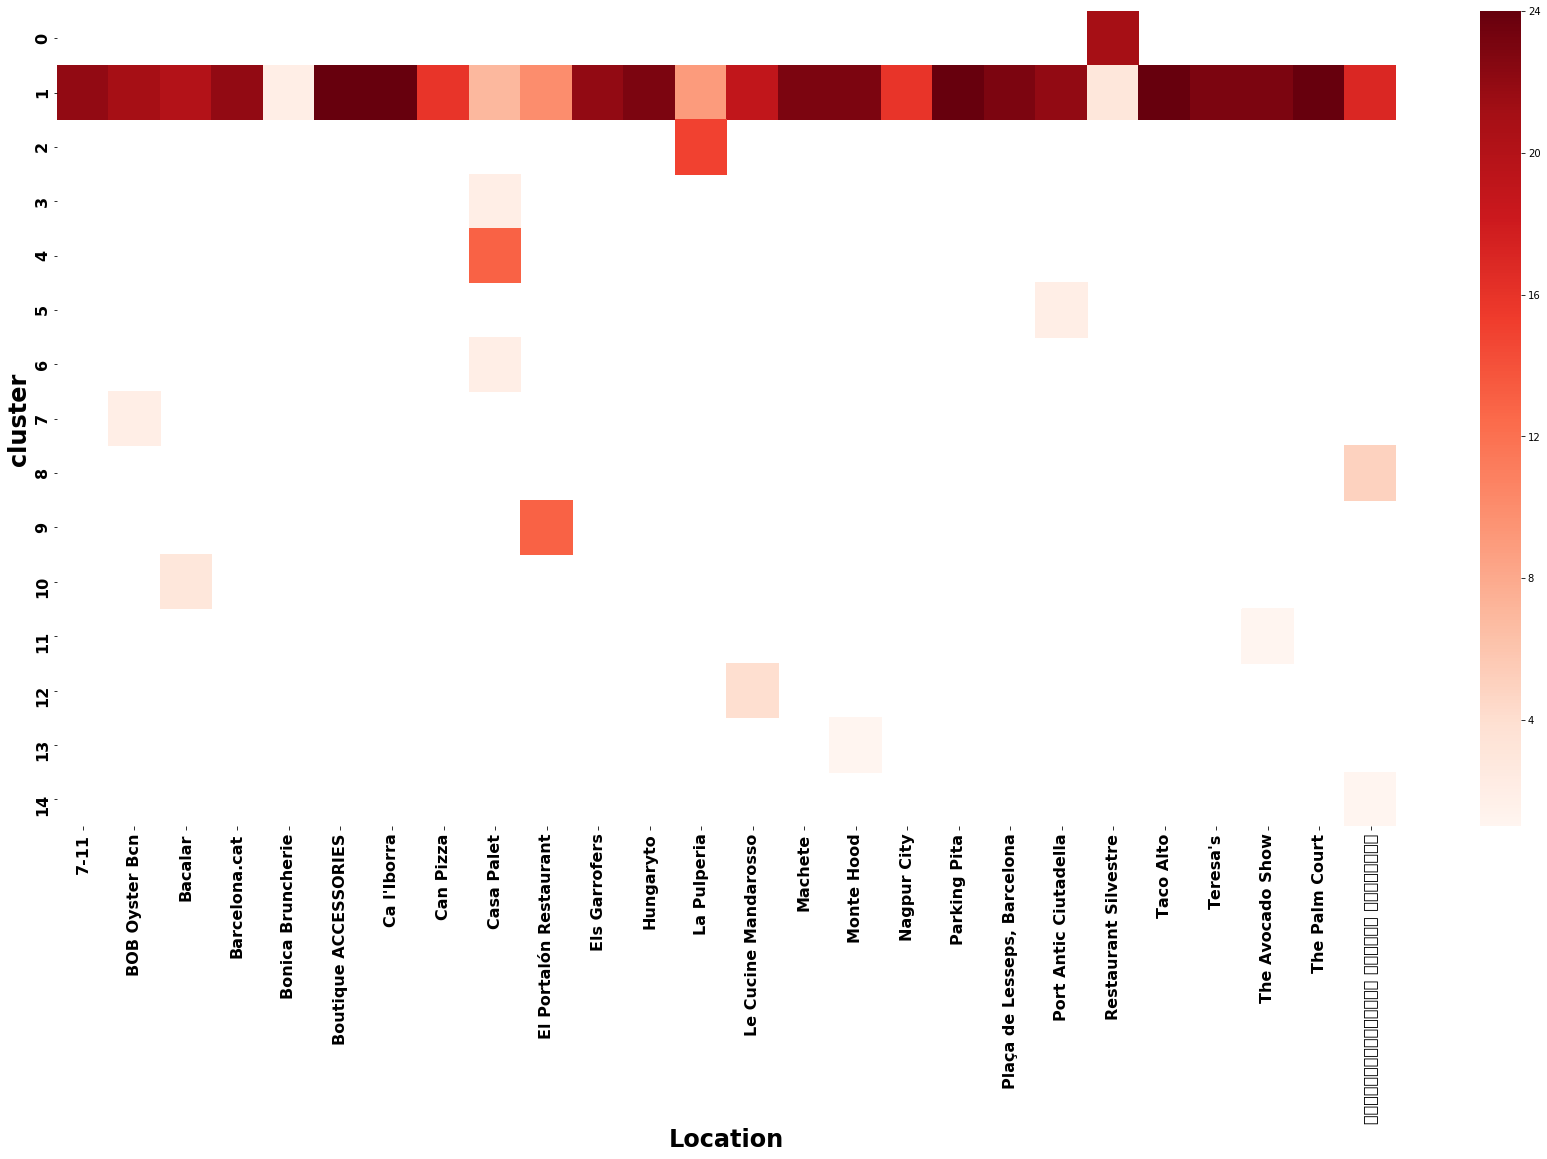

In [81]:
clusters = data2.groupby(['cluster', 'Location']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'Location'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('Location', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")